In [1]:
# Python 3 script for calculating Linear regression with multiple variables
# import numpy and pandas, and DataFrame / Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
    
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 22})

## Initialization

### Part 1: Feature Normalization 

In [2]:
print ('Loading data ...\n')
data = np.loadtxt('courseraLinearRegwMult/ex1data2.txt', delimiter=',')

Loading data ...



In [3]:
X = np.array(data[:,0:2])
y = np.array(data[:,2])
m = len(y)
y=np.resize(y, (m,1))

In [4]:
print ('First 10 examples from the dataset: \n')
for i in np.arange(10):
    print ("x = [%d %d], y = %d" % (X[i,0], X[i,1], y[i]) )

First 10 examples from the dataset: 

x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


In [5]:
# Scale features and set them to zero mean
print ('Normalizing Features ...\n')

Normalizing Features ...



In [6]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.        
    mu = X.mean(axis=0)
    # See http://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std
    # for ddof=1 explanation
    sigma = X.std(axis=0, ddof=1)  
    numerator = X - ((np.ones( (X.shape[0],X.shape[1]) ) * mu ))
    denominator = ((np.ones( (X.shape[0],X.shape[1]) ) * sigma ))

    X_norm = numerator / denominator

    return (X_norm, mu, sigma)

In [7]:
(X, mu, sigma) = featureNormalize(X)

In [8]:
# Add intercept term to X
X = np.hstack((np.ones((X.shape[0],1)), X))

## Part 2: Gradient Descent

In [9]:
print ('Running gradient descent ...\n')

Running gradient descent ...



In [10]:
# Choose some alpha value
alpha = 0.01
num_iters = 400

In [11]:
def computeCostMulti(X, y, theta):
    #COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    #   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    d = ((theta.T.dot(X.T)).T-y)
    d = d * d;

    J = (1.0/(2*m))*d.sum();

    return J

In [12]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = y.shape[0] # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in np.arange(num_iters):
        d = alpha*(1.0/m)*((theta.T.dot(X.T)).T-y).T.dot(X)
        theta = theta - d.T
        
        #print theta
        # Save the cost J in every iteration    
        J_history[iter] = computeCostMulti(X, y, theta)
          
        #print J_history[iter]
    return (theta, J_history)

In [13]:
# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
(theta, J_history) = gradientDescentMulti(X, y, theta, alpha, num_iters)

In [14]:
# Plot the convergence graph

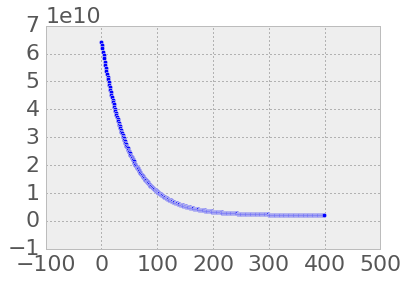

In [15]:
N = num_iters
xx = np.arange(N)
yy = J_history
plt.scatter(xx, yy)

In [16]:
# Display gradient descent's result
print ('Theta computed from gradient descent: \n')
print (theta)

Theta computed from gradient descent: 

[[ 334302.06399328]
 [ 100087.11600585]
 [   3673.54845093]]


In [17]:
# Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
pred=(np.array([[1650, 3]])-mu)/sigma
pred=np.hstack(([[1]],pred))
print ('%.0f' % theta.T.dot(pred.T))

289315
